### S12 T02: Tasca de web scraping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Exercici 1

Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.

In [2]:
#retrieve the HTML and use BeautifulSoup to parse structured data

import requests
from bs4 import BeautifulSoup

URL = "https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000&punto=indice"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
print(soup.text)





	Bolsa de Madrid - Precios Sesión






 English 
 Contacto  Horario Mercado  Calendario bursátil  RSS    














Buscador deempresas












Inicio / ÍNDICES / Índices IBEX / Precios Sesión >






SOBRE NOSOTROS

Bolsa de Madrid
Historia de la Bolsa
El Palacio de la Bolsa

Historia del Palacio
Visitas Guiadas
Visita Virtual
Actos y Conferencias
Aperturas de Honor

Formación

Cursos y Masters

Protector del Inversor

Información General
Consultas y Reclamaciones
Informes Anuales
Normativa

Miembros

Listado de miembros
Cómo ser miembro

Regulación
Cánones
Dónde estamos
Contacto

MERCADOS Y COTIZACIONES

Acciones

Precios de la sesión
Gráficos históricos

ETFs
Warrants
BME Growth
Latibex
BME IICs - Sicavs
BME IICs - Sil
BME IICs - Fondos
BME ECR - Ecr
Mi cartera

ÍNDICES

Resumen de Índices
Índices IBEX

Precios Sesión
Gráficos históricos
Precios históricos
Informes

Resumen Diario
Resumen Semanal
Informe Anual
Informe Mensual
Composición

Composición histórica
10 pregun

In [3]:
#find elements by ID

results = soup.find(id='ctl00_Contenido_tblAcciones')
print(results.prettify())

<table cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblAcciones" width="100%">
 <tr align="center">
  <th scope="col">
   Nombre
  </th>
  <th scope="col">
   Últ.
  </th>
  <th scope="col">
   % Dif.
  </th>
  <th scope="col">
   Máx.
  </th>
  <th scope="col">
   Mín.
  </th>
  <th scope="col">
   Volumen
  </th>
  <th scope="col">
   Efectivo (miles €)
  </th>
  <th scope="col">
   Fecha
  </th>
  <th class="Ult" scope="col">
   Hora
  </th>
 </tr>
 <tr align="right">
  <td align="left" class="DifFlSb">
   <a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0125220311">
    ACCIONA
   </a>
  </td>
  <td>
   168,1000
  </td>
  <td class="DifClSb">
   0,06
  </td>
  <td>
   169,7000
  </td>
  <td>
   167,6000
  </td>
  <td>
   47.084
  </td>
  <td>
   7.928,52
  </td>
  <td align="center">
   30/12/2021
  </td>
  <td align="center" class="Ult">
   Cierre
  </td>
 </tr>
 <tr align="right">
  <td align="left" class="DifFlBj">
   <a href="/esp/aspx/Empresas/FichaVal

In [4]:
#Find elements by HTML Class Name and ID

stocks = soup.find(class_="TblPort", id="ctl00_Contenido_tblAcciones")
stocks.text

'\n\nNombreÚlt.% Dif.Máx.Mín.VolumenEfectivo (miles €)FechaHora\n\nACCIONA168,10000,06169,7000167,600047.0847.928,5230/12/2021Cierre\n\nACERINOX11,3850-1,1311,540011,3850686.9787.869,7630/12/2021Cierre\n\nACS23,57001,0723,580023,2200639.41215.000,4430/12/2021Cierre\n\nAENA138,8000-0,04138,9000137,750057.3767.954,2730/12/2021Cierre\n\nALMIRALL11,30000,6211,340011,1800255.8512.885,0930/12/2021Cierre\n\nAMADEUS59,64000,7859,700058,9200259.31115.435,0430/12/2021Cierre\n\nARCELORMIT.28,3750-1,2428,825028,3750332.8189.489,9930/12/2021Cierre\n\nB.SANTANDER2,94050,622,95102,915536.172.951106.224,9530/12/2021Cierre\n\nBA.SABADELL0,5918-0,300,59460,587814.101.2348.337,5830/12/2021Cierre\n\nBANKINTER4,5090-0,244,54204,48201.368.1966.161,7930/12/2021Cierre\n\nBBVA5,2500-0,305,28205,233013.971.73073.431,0730/12/2021Cierre\n\nCAIXABANK2,41400,582,42802,39506.962.88916.794,4030/12/2021Cierre\n\nCELLNEX51,18001,3151,180050,2400779.94739.830,2930/12/2021Cierre\n\nCIE AUTOMOT.27,36000,2227,500027,000014

In [5]:
#finding the rows

table_rows = stocks.find_all("tr")  #these are the rows in the html

lines = []
items =[]

for row in table_rows: 
    attributes = row.find_all(["th","td"])  #finding all table header and table data
    items = []
    for att in attributes:
        items.append(att.text.strip())
    lines.append(items)

print(lines)

[['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora'], ['ACCIONA', '168,1000', '0,06', '169,7000', '167,6000', '47.084', '7.928,52', '30/12/2021', 'Cierre'], ['ACERINOX', '11,3850', '-1,13', '11,5400', '11,3850', '686.978', '7.869,76', '30/12/2021', 'Cierre'], ['ACS', '23,5700', '1,07', '23,5800', '23,2200', '639.412', '15.000,44', '30/12/2021', 'Cierre'], ['AENA', '138,8000', '-0,04', '138,9000', '137,7500', '57.376', '7.954,27', '30/12/2021', 'Cierre'], ['ALMIRALL', '11,3000', '0,62', '11,3400', '11,1800', '255.851', '2.885,09', '30/12/2021', 'Cierre'], ['AMADEUS', '59,6400', '0,78', '59,7000', '58,9200', '259.311', '15.435,04', '30/12/2021', 'Cierre'], ['ARCELORMIT.', '28,3750', '-1,24', '28,8250', '28,3750', '332.818', '9.489,99', '30/12/2021', 'Cierre'], ['B.SANTANDER', '2,9405', '0,62', '2,9510', '2,9155', '36.172.951', '106.224,95', '30/12/2021', 'Cierre'], ['BA.SABADELL', '0,5918', '-0,30', '0,5946', '0,5878', '14.101.234', '8.337,58', 

In [6]:
#creating the dataframe

stocks_df = pd.DataFrame(lines[1:], columns=lines[0])
stocks_df.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"168,1000","0,06","169,7000","167,6000",47.084,"7.928,52",30/12/2021,Cierre
1,ACERINOX,"11,3850","-1,13","11,5400","11,3850",686.978,"7.869,76",30/12/2021,Cierre
2,ACS,"23,5700","1,07","23,5800","23,2200",639.412,"15.000,44",30/12/2021,Cierre
3,AENA,"138,8000","-0,04","138,9000","137,7500",57.376,"7.954,27",30/12/2021,Cierre
4,ALMIRALL,"11,3000","0,62","11,3400","11,1800",255.851,"2.885,09",30/12/2021,Cierre


In [7]:
#saving the table in a csv file

stocks_df.to_csv('stocks.csv')

#### Selenium

In [18]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By 

In [19]:
#create a headless Firefox browser

opts = Options()
opts.headless = True
browser = Firefox(options=opts)
browser.get('https://www.bolsamadrid.es/esp/aspx/Portada/Portada.aspx')

In [20]:
#click on "Empresas Cotizadas"

indices_link = browser.find_element_by_link_text("EMPRESAS COTIZADAS")
indices_link.click()

In [21]:
#click on "Lista de Empresas"

indices_link = browser.find_element_by_link_text("Lista de Empresas")
indices_link.click()

In [22]:
#Fetch the table of "Lista de Empresas"

companies = browser.find_element(By.CLASS_NAME, "TblPort")
print(companies.text)

Nombre Sector - Subsector Mercado Índices
ABENGOA, S.A. Mat.Basicos, Industria y Construcción - Ingeniería y Otros Mercado Continuo  
ACCIONA,S.A. Mat.Basicos, Industria y Construcción - Construcción Mercado Continuo IBEX 35®
ACERINOX, S.A. Mat.Basicos, Industria y Construcción - Mineral, Metales y Transformación Mercado Continuo IBEX 35®, IBEX TOP Dividendo®
ACS,ACTIVIDADES DE CONST.Y SERVICIOS S.A Mat.Basicos, Industria y Construcción - Construcción Mercado Continuo IBEX 35®, IBEX TOP Dividendo®
ADOLFO DOMINGUEZ, S.A. Bienes de Consumo - Textil, Vestido y Calzado Mercado Continuo  
AEDAS HOMES, S.A. Servicios Inmobiliarios - Inmobiliarias y Otros Mercado Continuo  
AENA, S.M.E., S.A. Servicios de Consumo - Transporte y Distribución Mercado Continuo IBEX 35®
AIRBUS SE Mat.Basicos, Industria y Construcción - Aerospacial Mercado Continuo  
AIRTIFICIAL INTELLIGENCE STRUCTURES S.A. Mat.Basicos, Industria y Construcción - Ingeniería y Otros Mercado Continuo  
ALANTRA PARTNERS, S.A. Servici

In [24]:
#Extracting columns index

columns=[]

for element in companies.find_elements(By.TAG_NAME, "th"):    
    columns.append(element.text)
    
print(columns)

['Nombre', 'Sector - Subsector', 'Mercado', 'Índices']


In [25]:
#Extracting cells' content

results=[]

for element in companies.find_elements(By.TAG_NAME, "td"):    
    results.append(element.text)

print(results)

['ABENGOA, S.A.', 'Mat.Basicos, Industria y Construcción - Ingeniería y Otros', 'Mercado Continuo', ' ', 'ACCIONA,S.A.', 'Mat.Basicos, Industria y Construcción - Construcción', 'Mercado Continuo', 'IBEX 35®', 'ACERINOX, S.A.', 'Mat.Basicos, Industria y Construcción - Mineral, Metales y Transformación', 'Mercado Continuo', 'IBEX 35®, IBEX TOP Dividendo®', 'ACS,ACTIVIDADES DE CONST.Y SERVICIOS S.A', 'Mat.Basicos, Industria y Construcción - Construcción', 'Mercado Continuo', 'IBEX 35®, IBEX TOP Dividendo®', 'ADOLFO DOMINGUEZ, S.A.', 'Bienes de Consumo - Textil, Vestido y Calzado', 'Mercado Continuo', ' ', 'AEDAS HOMES, S.A.', 'Servicios Inmobiliarios - Inmobiliarias y Otros', 'Mercado Continuo', ' ', 'AENA, S.M.E., S.A.', 'Servicios de Consumo - Transporte y Distribución', 'Mercado Continuo', 'IBEX 35®', 'AIRBUS SE', 'Mat.Basicos, Industria y Construcción - Aerospacial', 'Mercado Continuo', ' ', 'AIRTIFICIAL INTELLIGENCE STRUCTURES S.A.', 'Mat.Basicos, Industria y Construcción - Ingenierí

In [29]:
#creating dataframe

data = {}
for i in range(4):
    data[columns[i]]=results[i::4]

df = pd.DataFrame(data)

In [30]:
df

,Nombre,Sector - Subsector,Mercado,Índices
0,"ABENGOA, S.A.","Mat.Basicos, Industria y Construcción - Ingeni...",Mercado Continuo,
1,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción - Constr...",Mercado Continuo,IBEX 35®
2,"ACERINOX, S.A.","Mat.Basicos, Industria y Construcción - Minera...",Mercado Continuo,"IBEX 35®, IBEX TOP Dividendo®"
3,"ACS,ACTIVIDADES DE CONST.Y SERVICIOS S.A","Mat.Basicos, Industria y Construcción - Constr...",Mercado Continuo,"IBEX 35®, IBEX TOP Dividendo®"
4,"ADOLFO DOMINGUEZ, S.A.","Bienes de Consumo - Textil, Vestido y Calzado",Mercado Continuo,
5,"AEDAS HOMES, S.A.",Servicios Inmobiliarios - Inmobiliarias y Otros,Mercado Continuo,
6,"AENA, S.M.E., S.A.",Servicios de Consumo - Transporte y Distribución,Mercado Continuo,IBEX 35®
7,AIRBUS SE,"Mat.Basicos, Industria y Construcción - Aerosp...",Mercado Continuo,
8,AIRTIFICIAL INTELLIGENCE STRUCTURES S.A.,"Mat.Basicos, Industria y Construcción - Ingeni...",Mercado Continuo,
9,"ALANTRA PARTNERS, S.A.",Servicios Financieros - Cartera y Holding,Mercado Continuo,


In [31]:
stocks_df.to_csv('companies_list.csv')

### Exercici 2

Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

**File can be found on Github repository.**

### Exercici 3

Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 

In [2]:
import scrapy
import requests
from scrapy import Selector

In [3]:
url = 'https://www.nytimes.com/'

In [4]:
#reads the website and stores the HTML content

html = requests.get(url).content

In [5]:
#parse the content with Selector library from scrapy

sel = Selector (text = html)

In [6]:
#I want to scrap all the headlines

news_headlines = sel.xpath ('//div/section/a/div/h3/text()').extract()

In [7]:
news_headlines

['Disruption, Dismay, Dissent: Americans Grapple With Omicron’s Rise',
 'Pandemic updates: Mass vaccination sites are making a return in the U.S.',
 'In the U.S. cities that had some of the earliest Omicron surges, I.C.U. stays and deaths are following case curves upward.',
 'Left Out of High-Level Talks, Ukraine Tries Other Diplomatic Channels',
 'Russia Warns That U.S. Doesn’t Understand Its Goals on Ukraine',
 'Russian forces surround Ukraine on three sides. This map shows how Moscow’s positioning could widen the conflict.',
 'Your Head of H.R. Is Now Basically the School Nurse',
 'A Rise in Deadly Border Patrol Chases Renews Concerns About Accountability',
 'After 4 Killings, an ‘Officer of the Year’ Is Still on the Job',
 'Apartment Fire in the Bronx Leaves Dozens Seriously Injured',
 'The Weekender: An Artist Blossoms in New Orleans’ Lower Ninth Ward',
 'Did you follow the news this week? Take our quiz.',
 '‘All Creatures Great and Small’ Returns With Even More Creatures',
 'Anni

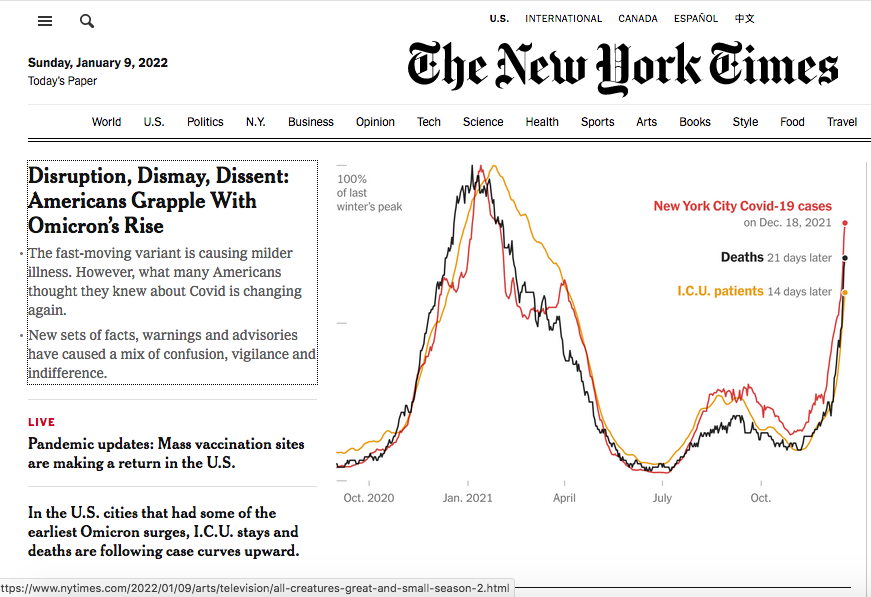

This is the path that I've used to scrap the headlines:

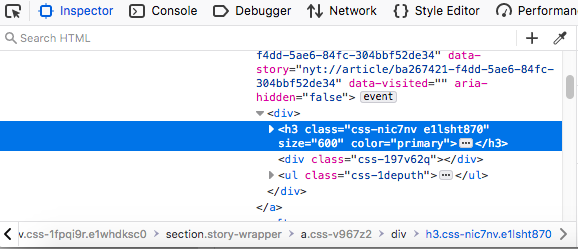